In [1]:
# Importing Required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Importing Dataset

df = pd.read_csv(r'D:\SRIKAR_NRK\Upgrad Data Science Course\Practice Docs\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

## Checking the DataFrame

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking shape of the dataframe
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking every column's Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Duplicates check in Prospet ID

sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#Duplicates check in Lead Number

sum(df.duplicated(subset = 'Lead Number')) == 0

True

### No duplicates were found in either Prospect ID and Lead Number

### Data Cleaning 

In [9]:
# Dropping Lead Number and Prospect ID since they have all unique values
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Checking missing values count in each column
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# Dropping Columns with Missing Values greater than 35%

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 35):
        df.drop(i, 1, inplace = True)

In [13]:
#checking percentage of null values in each column after dropping columns with more than 35% missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

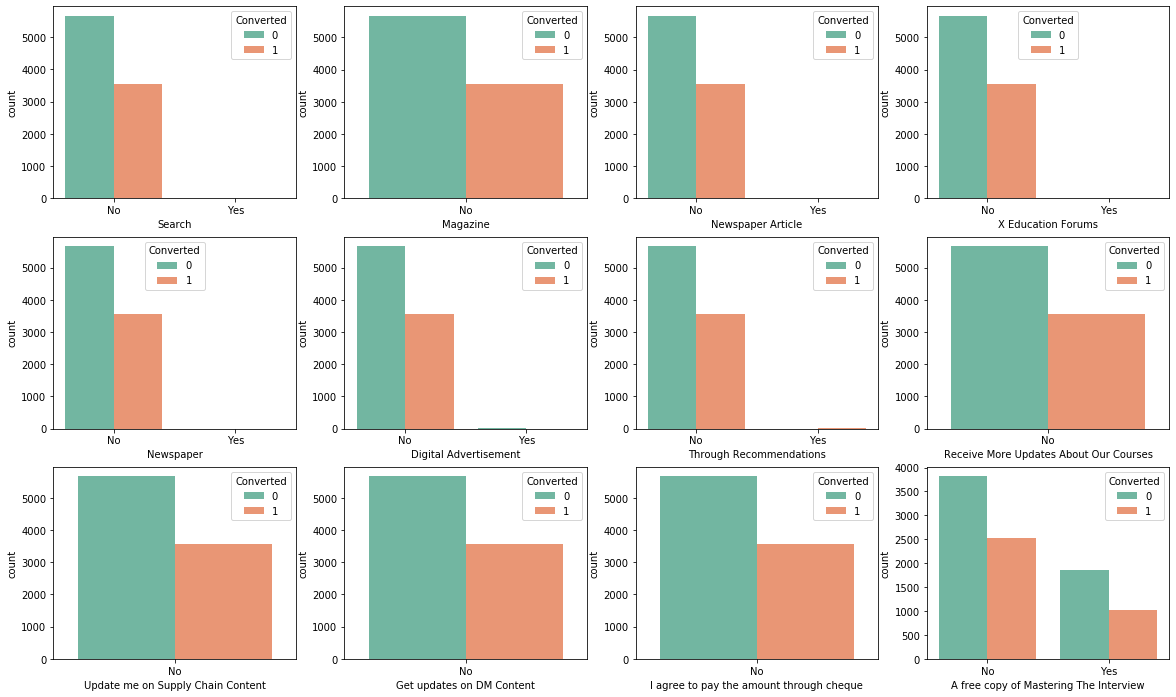

In [14]:
# Categorical Attributes Analysis
# Visualzing  variables for imbalancing

fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df, ax = axs[2,3],palette = 'Set2')
plt.show()

### Inference

#### For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
#### "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [15]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [16]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [17]:
# Google is having highest number of occurences, so we will impute the missing values with label 'Google'
# Replacing Nan Value with Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [18]:
# Combining low frequency values to Others

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

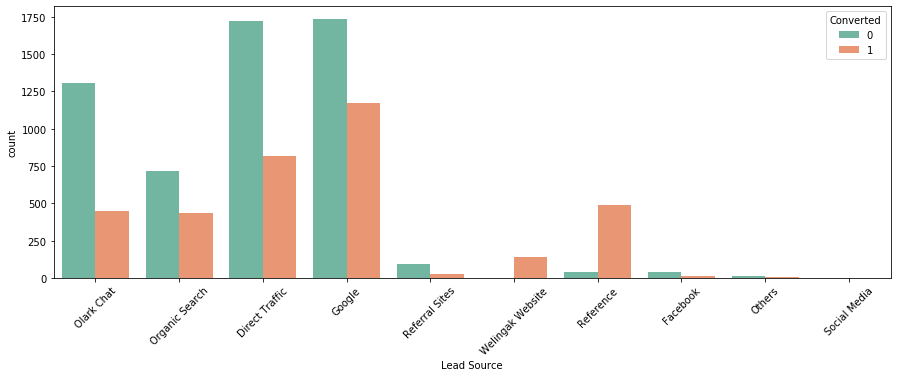

In [19]:
# Visualizing count of Lead Source Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

Maximum Leads are generated by Google and Direct Traffic.

In [20]:
# Checking the value counts of Country Columns

df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Philippines                2
Ghana                      2
Bangladesh                 2
Netherlands                2
China                      2
Uganda                     2
Belgium                    2
Russia                     1
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Kenya                      1
Malaysia      

In [21]:
# Since, missing values are very high , we can impute all missing values with value 'not provided'
#Imputing missing values in Country column with "'not provided"

df['Country'] = df['Country'].replace(np.nan,'not provided')

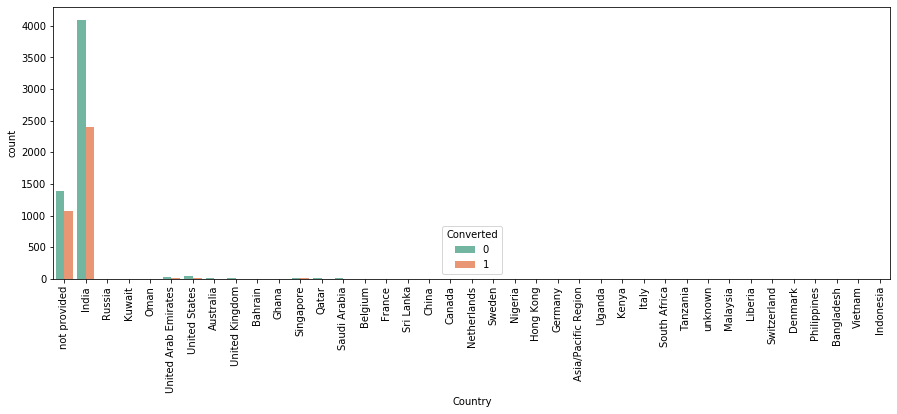

In [22]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [23]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [24]:
# Checking value counts of 'Current occupation' column

df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# Creating new category 'Not provided' for NaN

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Not provided')

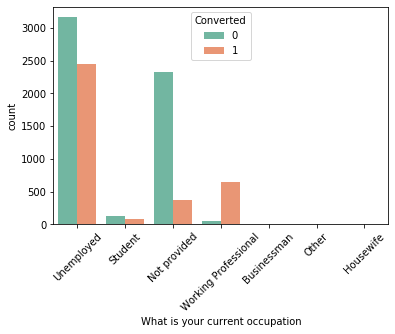

In [26]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

Maximum leads generated are unemployed and their conversion rate is more than 50%.

Conversion rate of working professionals is very high.

In [27]:
#checking value counts of 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
# Imputing NaN by 'Better Career Prospects'

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

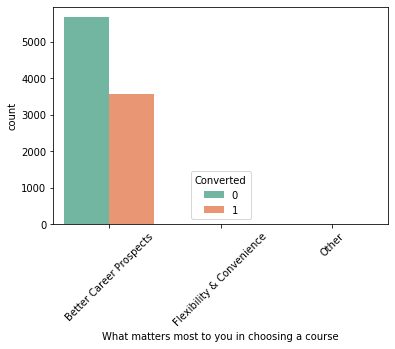

In [29]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [30]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [31]:
#checking value counts of Last Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
#replacing Nan Values with mode value "Email Opened"

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Email Opened')

In [33]:
#combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

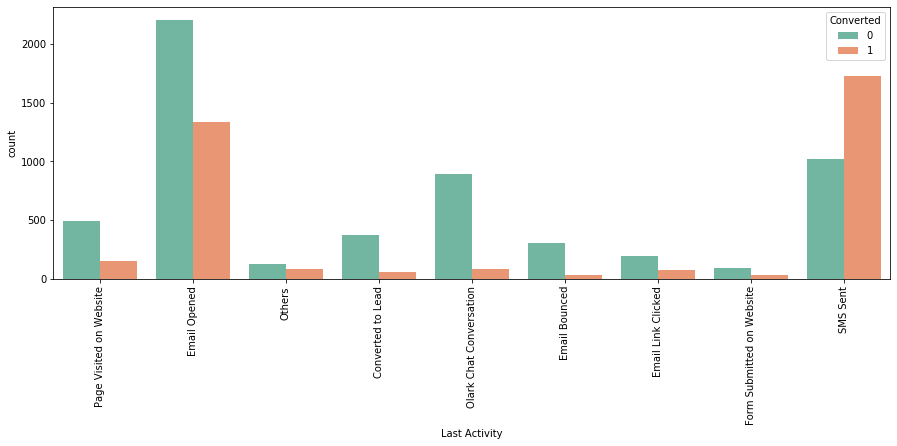

In [34]:
# Visualizing count of Last Activity Variable

plt.figure(figsize=(15,5))
s1=sns.countplot(x = 'Last Activity', hue = 'Converted', data = df, palette ='Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

#### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [35]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data

cols_to_drop.append('Last Activity')

# Checking updated list for columns to be dropped

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [36]:
# Check the Null Values in All Columns after imputation:

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [37]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
df = df.dropna()

In [38]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [39]:
df.shape

(6401, 29)

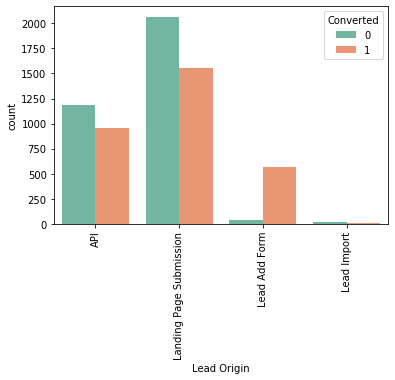

In [40]:
# Checking Lead Origin

s1=sns.countplot(x='Lead Origin', hue='Converted' , data = df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

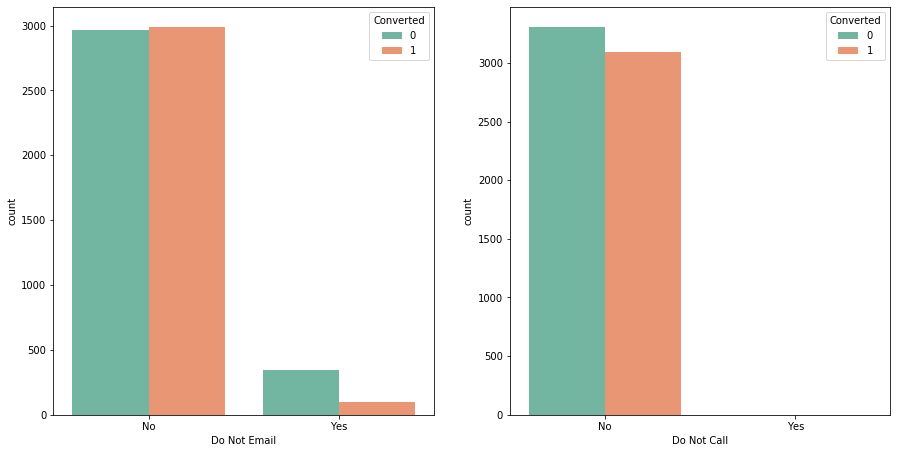

In [41]:
# Checking Do Not Email and Do Not Call

fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1],palette = 'Set2')
plt.show()

In [42]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [43]:
# Checking value counts of last Notable Activity

df['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1950
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

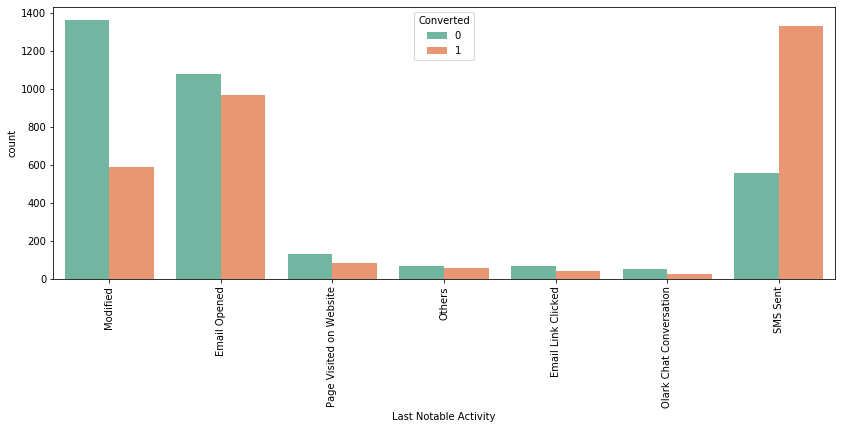

In [45]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1 = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.show()

#### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [46]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data

cols_to_drop.append('Last Notable Activity')

In [47]:
# checking final list of columns to be dropped

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [48]:
# Dropping columns
leads = df.drop(cols_to_drop,1)

# Checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         6401 non-null   object 
 1   Lead Source                         6401 non-null   object 
 2   Do Not Email                        6401 non-null   object 
 3   Converted                           6401 non-null   int64  
 4   TotalVisits                         6401 non-null   float64
 5   Total Time Spent on Website         6401 non-null   int64  
 6   Page Views Per Visit                6401 non-null   float64
 7   Specialization                      6401 non-null   object 
 8   How did you hear about X Education  6401 non-null   object 
 9   What is your current occupation     6401 non-null   object 
 10  Lead Profile                        6401 non-null   object 
 11  City                                6401 no

In [49]:
# Checking dataset

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City
0,API,Olark Chat,No,0,0.0,0,0.0,Select,Select,Unemployed,Select,Select
1,API,Organic Search,No,0,5.0,674,2.5,Select,Select,Unemployed,Select,Select
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Select,Student,Potential Lead,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Select,Other,Unemployed,Select,Mumbai


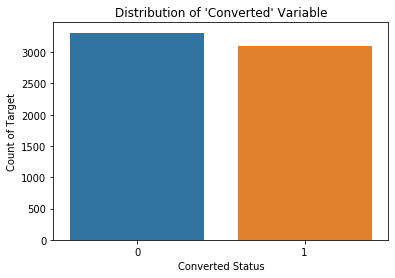

In [50]:
# Visualizing Distribution of 'Converted' Variable

sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [51]:
# Finding out conversion rate

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.28932979221997

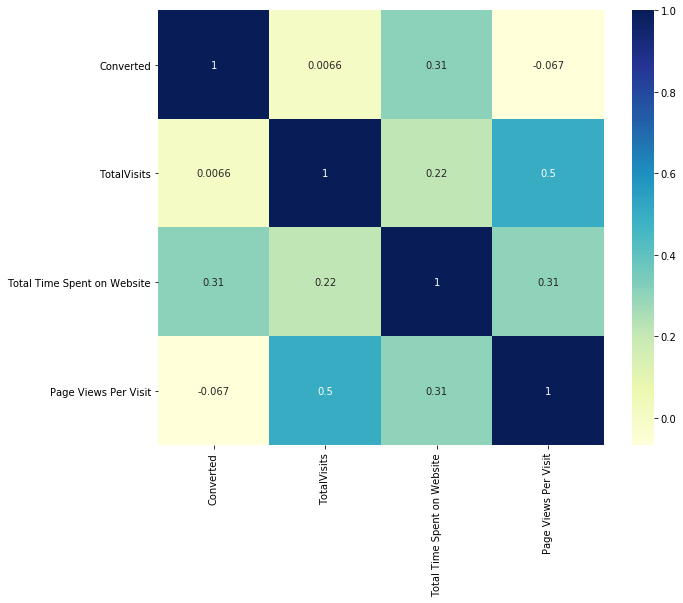

In [52]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize = (10,8))

# heatmap
sns.heatmap(leads.corr(), cmap = "YlGnBu", annot = True)
plt.show()

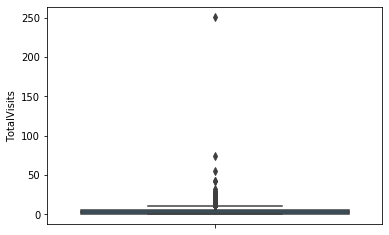

In [53]:
# Visualizing spread of variable Total Visits

sns.boxplot(y = leads['TotalVisits'])
plt.show()

In [54]:
# Checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean        3.590689
std         4.847158
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

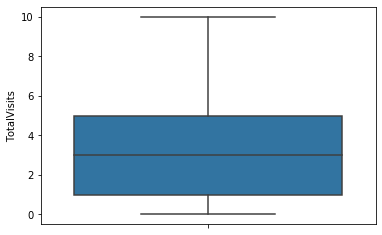

In [55]:
# Outlier Treatment: Capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

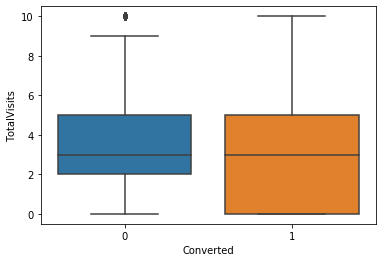

In [56]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [57]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean      532.855491
std       565.262896
min         0.000000
5%          0.000000
25%        31.000000
50%       283.000000
75%      1020.000000
90%      1426.000000
95%      1591.000000
99%      1849.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

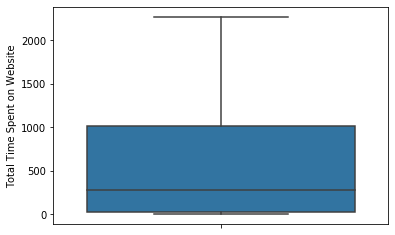

In [58]:
# Visualizing spread of variable 'Total Time Spent on Website'

sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

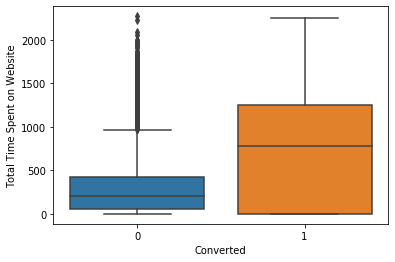

In [59]:
# Since there are no major outliers for the above variable, outlier treatment is not required for it
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

#### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

In [60]:
leads['Page Views Per Visit'].describe()

count    6401.000000
mean        2.468644
std         2.167626
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

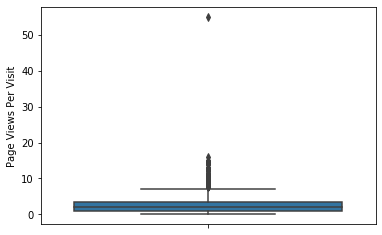

In [61]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

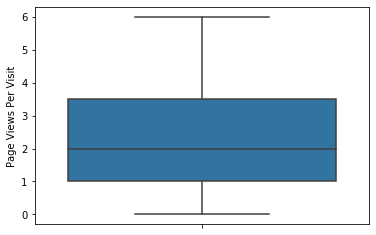

In [62]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

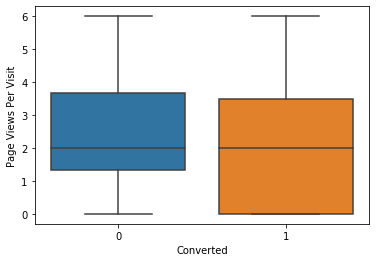

In [63]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Inference

Median for converted and not converted leads is almost same.
Nothing conclusive can be said on the basis of Page Views Per Visit.

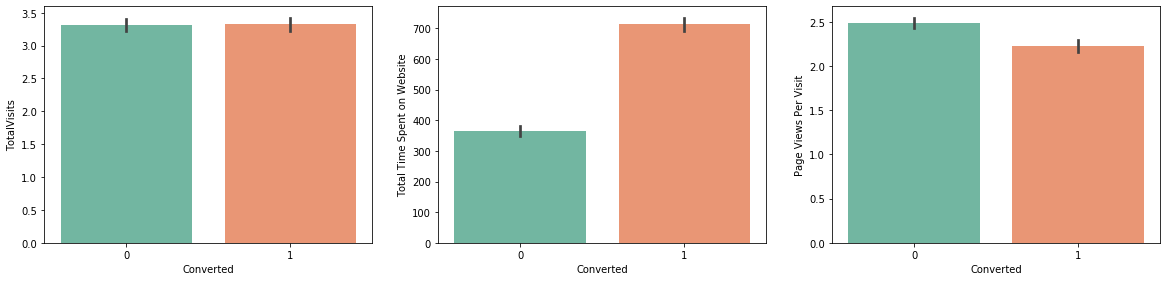

In [64]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()


### Data Preparation

In [65]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def bmap(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(bmap)

In [66]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City
0,API,Olark Chat,0,0,0.0,0,0.0,Select,Select,Unemployed,Select,Select
1,API,Organic Search,0,0,5.0,674,2.5,Select,Select,Unemployed,Select,Select
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Select,Student,Potential Lead,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Select,Other,Unemployed,Select,Mumbai


In [67]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         6401 non-null   object 
 1   Lead Source                         6401 non-null   object 
 2   Do Not Email                        6401 non-null   int64  
 3   Converted                           6401 non-null   int64  
 4   TotalVisits                         6401 non-null   float64
 5   Total Time Spent on Website         6401 non-null   int64  
 6   Page Views Per Visit                6401 non-null   float64
 7   Specialization                      6401 non-null   object 
 8   How did you hear about X Education  6401 non-null   object 
 9   What is your current occupation     6401 non-null   object 
 10  Lead Profile                        6401 non-null   object 
 11  City                                6401 no

In [68]:
#getting a list of categorical columns foy creating dummy

ccols= leads.select_dtypes(include=['object']).columns
ccols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'City'],
      dtype='object')

In [69]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [70]:
#dropping the original columns after dummy variable creation

leads.drop(ccols,1,inplace = True)

In [71]:
#checking dataset after dummy variable creation
leads.head()


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0


In [72]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0


In [73]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
6099,-0.273127,2.350427,-0.809479,2.025517,1,0,0,0,0,0,0,1,0,0,0,0
5581,-0.273127,-1.192374,-0.940692,-1.320622,0,0,0,0,0,0,1,0,0,0,0,0
1329,-0.273127,0.933307,0.456548,2.025517,1,0,0,0,0,0,0,1,0,0,0,0
7102,-0.273127,0.933307,-0.181785,-0.205242,1,0,0,0,0,0,0,1,0,0,0,0
7326,-0.273127,-1.192374,-0.940692,-1.320622,0,1,0,0,0,0,0,0,1,0,0,0


In [76]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

48.28932979221997

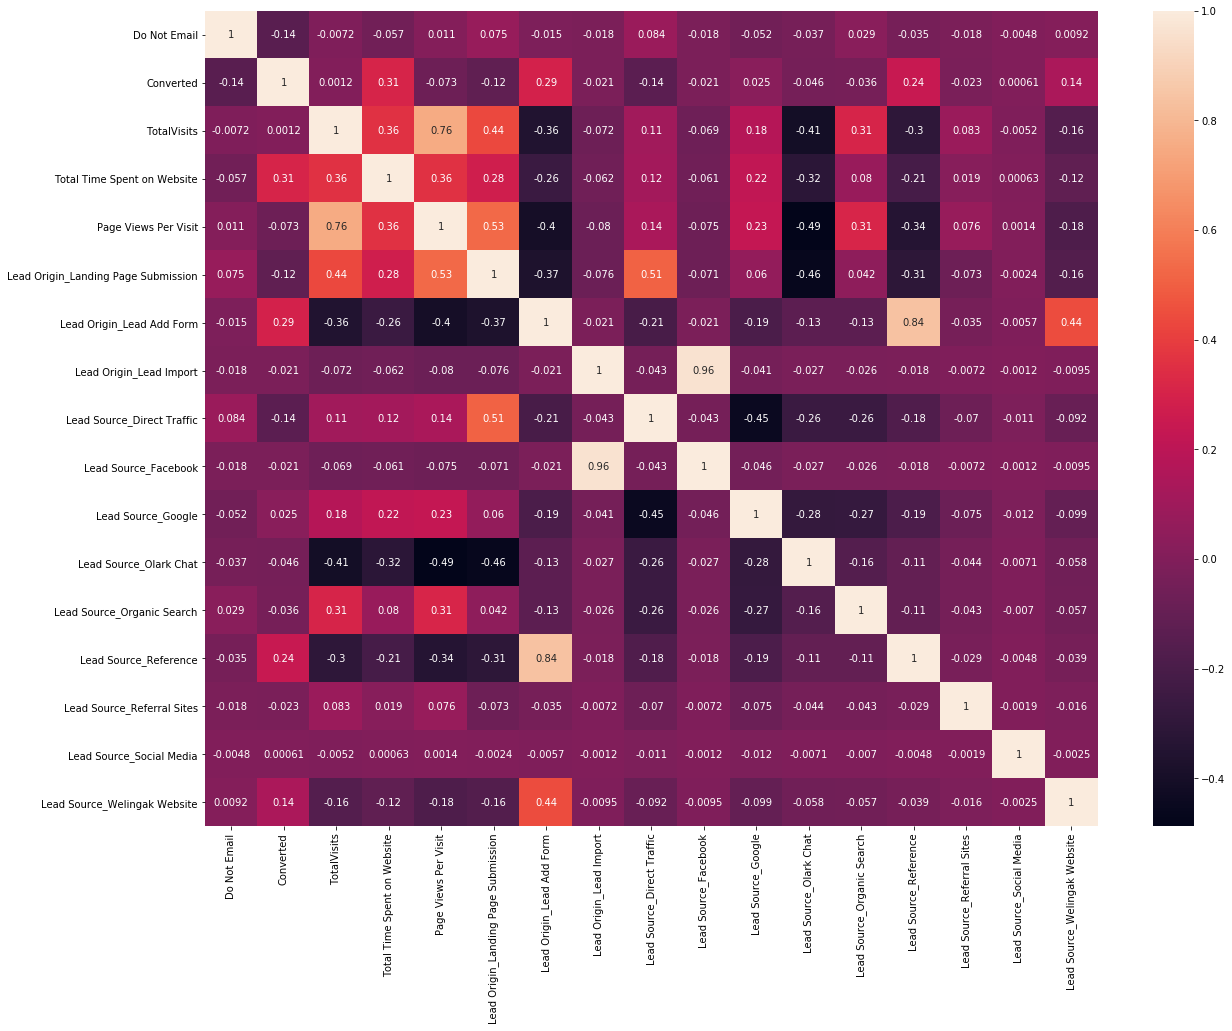

In [77]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [78]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [79]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [80]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1)]

In [83]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [85]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.4
Date:                Sat, 02 Sep 2023   Deviance:                       4686.8
Time:                        01:28:51   Pearson chi2:                 4.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7540      0.111      6.773      0.000       0.536       0.972
Do Not Email                    -0.2959      0.043     -6.827      0.000      -0.381      -0.211
TotalVisits                      0.2870      0.056      5.155      0.000       0.178       0.396
Total Time Spent on Website      1.1688      0.044     26.267      0.000       1.082       1.256
Page Views Per Visit            -0.1064      0.061     -1.755      0.079      -0.225       0.012
Lead Origin_Lead Add Form        4.4728      0.760      5.885      0.000       2.983       5.963
Lead Origin_Lead Import         -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Direct Traffic      -1.6237      0.141    -11.509      0.000      -1.900      -1.347
Lead Source_Facebook            -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Google              -1.1917      0.141     -8.473      0.000      -1.467      -0.916
Lead Source_Organic Search      -1.4193      0.172     -8.275      0.000      -1.755      -1.083
Lead Source_Reference           -1.6662      0.789     -2.111      0.035      -3.213      -0.119
Lead Source_Referral Sites      -1.7803      0.366     -4.862      0.000      -2.498      -1.063
Lead Source_Social Media       -20.5666   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Welingak Website     0.6088      1.262      0.482      0.630      -1.866       3.083
================================================================================================
"""

In [86]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.4
Date:                Sat, 02 Sep 2023   Deviance:                       4686.8
Time:                        01:28:51   Pearson chi2:                 4.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7540      0.111      6.773      0.000       0.536       0.972
Do Not Email                    -0.2959      0.043     -6.827      0.000      -0.381      -0.211
TotalVisits                      0.2870      0.056      5.155      0.000       0.178       0.396
Total Time Spent on Website      1.1688      0.044     26.267      0.000       1.082       1.256
Page Views Per Visit            -0.1064      0.061     -1.755      0.079      -0.225       0.012
Lead Origin_Lead Add Form        4.4728      0.760      5.885      0.000       2.983       5.963
Lead Origin_Lead Import         -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Direct Traffic      -1.6237      0.141    -11.509      0.000      -1.900      -1.347
Lead Source_Facebook            -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Google              -1.1917      0.141     -8.473      0.000      -1.467      -0.916
Lead Source_Organic Search      -1.4193      0.172     -8.275      0.000      -1.755      -1.083
Lead Source_Reference           -1.6662      0.789     -2.111      0.035      -3.213      -0.119
Lead Source_Referral Sites      -1.7803      0.366     -4.862      0.000      -2.498      -1.063
Lead Source_Social Media       -20.5666   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Welingak Website     0.6088      1.262      0.482      0.630      -1.866       3.083
================================================================================================
"""

In [87]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.4
Date:                Sat, 02 Sep 2023   Deviance:                       4686.8
Time:                        01:28:51   Pearson chi2:                 4.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7540      0.111      6.773      0.000       0.536       0.972
Do Not Email                    -0.2959      0.043     -6.827      0.000      -0.381      -0.211
TotalVisits                      0.2870      0.056      5.155      0.000       0.178       0.396
Total Time Spent on Website      1.1688      0.044     26.267      0.000       1.082       1.256
Page Views Per Visit            -0.1064      0.061     -1.755      0.079      -0.225       0.012
Lead Origin_Lead Add Form        4.4728      0.760      5.885      0.000       2.983       5.963
Lead Origin_Lead Import         -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Direct Traffic      -1.6237      0.141    -11.509      0.000      -1.900      -1.347
Lead Source_Facebook            -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Google              -1.1917      0.141     -8.473      0.000      -1.467      -0.916
Lead Source_Organic Search      -1.4193      0.172     -8.275      0.000      -1.755      -1.083
Lead Source_Reference           -1.6662      0.789     -2.111      0.035      -3.213      -0.119
Lead Source_Referral Sites      -1.7803      0.366     -4.862      0.000      -2.498      -1.063
Lead Source_Social Media       -20.5666   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Welingak Website     0.6088      1.262      0.482      0.630      -1.866       3.083
================================================================================================
"""

In [88]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.4
Date:                Sat, 02 Sep 2023   Deviance:                       4686.8
Time:                        01:28:51   Pearson chi2:                 4.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7540      0.111      6.773      0.000       0.536       0.972
Do Not Email                    -0.2959      0.043     -6.827      0.000      -0.381      -0.211
TotalVisits                      0.2870      0.056      5.155      0.000       0.178       0.396
Total Time Spent on Website      1.1688      0.044     26.267      0.000       1.082       1.256
Page Views Per Visit            -0.1064      0.061     -1.755      0.079      -0.225       0.012
Lead Origin_Lead Add Form        4.4728      0.760      5.885      0.000       2.983       5.963
Lead Origin_Lead Import         -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Direct Traffic      -1.6237      0.141    -11.509      0.000      -1.900      -1.347
Lead Source_Facebook            -0.1820      0.274     -0.665      0.506      -0.718       0.354
Lead Source_Google              -1.1917      0.141     -8.473      0.000      -1.467      -0.916
Lead Source_Organic Search      -1.4193      0.172     -8.275      0.000      -1.755      -1.083
Lead Source_Reference           -1.6662      0.789     -2.111      0.035      -3.213      -0.119
Lead Source_Referral Sites      -1.7803      0.366     -4.862      0.000      -2.498      -1.063
Lead Source_Social Media       -20.5666   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Welingak Website     0.6088      1.262      0.482      0.630      -1.866       3.083
================================================================================================
"""

In [89]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Import,inf
7,Lead Source_Facebook,inf
4,Lead Origin_Lead Add Form,15.23
10,Lead Source_Reference,11.87
13,Lead Source_Welingak Website,4.01
3,Page Views Per Visit,2.57
1,TotalVisits,2.42
2,Total Time Spent on Website,1.23
9,Lead Source_Organic Search,1.15
8,Lead Source_Google,1.09


In [90]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6099    0.255093
5581    0.385481
1329    0.500371
7102    0.375839
7326    0.912158
7288    0.385481
8504    0.889805
494     0.795774
1338    0.125523
8732    0.385481
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25509278, 0.38548096, 0.50037139, 0.37583925, 0.91215831,
       0.38548096, 0.8898052 , 0.79577362, 0.12552293, 0.38548096])

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.255093,6099
1,0,0.385481,5581
2,1,0.500371,1329
3,1,0.375839,7102
4,1,0.912158,7326


In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.255093,6099,0
1,0,0.385481,5581,0
2,1,0.500371,1329,1
3,1,0.375839,7102,0
4,1,0.912158,7326,1


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1942  385]
 [ 680 1473]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7622767857142857


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6841616349280074

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8345509239363988

In [99]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1654490760636012


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.7927879440258342


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7406559877955758


#### PLOTTING ROC CURVE
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

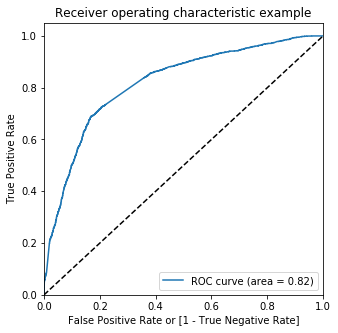

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.255093,6099,0,1,1,1,0,0,0,0,0,0,0
1,0,0.385481,5581,0,1,1,1,1,0,0,0,0,0,0
2,1,0.500371,1329,1,1,1,1,1,1,1,0,0,0,0
3,1,0.375839,7102,0,1,1,1,1,0,0,0,0,0,0
4,1,0.912158,7326,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480580  1.000000  0.000000
0.1   0.1  0.511607  0.999071  0.060593
0.2   0.2  0.603348  0.949837  0.282768
0.3   0.3  0.710491  0.881096  0.552643
0.4   0.4  0.759598  0.728751  0.788139
0.5   0.5  0.762277  0.684162  0.834551
0.6   0.6  0.735938  0.594984  0.866352
0.7   0.7  0.702902  0.484905  0.904598
0.8   0.8  0.652009  0.337668  0.942845
0.9   0.9  0.608705  0.207153  0.980232


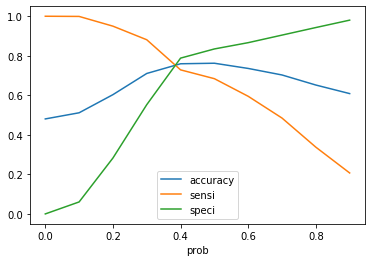

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.255093,6099,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.385481,5581,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.500371,1329,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.375839,7102,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.912158,7326,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.255093,6099,0,26
1,0,0.385481,5581,1,39
2,1,0.500371,1329,1,50
3,1,0.375839,7102,1,38
4,1,0.912158,7326,1,91


In [109]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1897
0     256
Name: final_Predicted, dtype: int64

In [110]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7104910714285714

In [112]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1286, 1041],
       [ 256, 1897]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8810961449140734

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.5526428878384185

In [116]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.4473571121615814


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6456773315180395


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.833981841763943


In [119]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1286, 1041],
       [ 256, 1897]], dtype=int64)

In [120]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6456773315180395

In [121]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8810961449140734

In [122]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6456773315180395

In [123]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8810961449140734

In [124]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [125]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

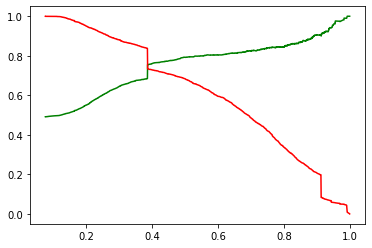

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [127]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
2413,-0.270526,-0.451915,-0.347307,-0.198289,0,0,1,0,0,0,0,0,0,0
1567,-0.270526,-1.197090,-0.947568,-1.340647,1,0,0,0,0,0,1,0,0,0
4130,-0.270526,1.038435,0.898985,-0.198289,0,0,0,0,1,0,0,0,0,0
3842,-0.270526,-1.197090,-0.947568,-1.340647,0,0,0,0,0,0,0,0,0,0
6843,-0.270526,-0.079328,1.493965,0.372890,0,0,1,0,0,0,0,0,0,0


In [128]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
2413,-0.270526,-0.451915,-0.347307,-0.198289,0,0,1,0,0,0,0,0,0,0
1567,-0.270526,-1.197090,-0.947568,-1.340647,1,0,0,0,0,0,1,0,0,0
4130,-0.270526,1.038435,0.898985,-0.198289,0,0,0,0,1,0,0,0,0,0
3842,-0.270526,-1.197090,-0.947568,-1.340647,0,0,0,0,0,0,0,0,0,0
6843,-0.270526,-0.079328,1.493965,0.372890,0,0,1,0,0,0,0,0,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
X_test_sm.shape

(1921, 15)

In [131]:
y_test_pred = res.predict(X_test_sm)    
y_test_pred[:10]

2413    0.213464
1567    0.911513
4130    0.733446
3842    0.383581
6843    0.709742
8209    0.155107
6345    0.520637
6060    0.383581
4083    0.211399
1852    0.212898
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
2413,0.213464
1567,0.911513
4130,0.733446
3842,0.383581
6843,0.709742


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2413,0.213464
1,1,1567,0.911513
2,0,4130,0.733446
3,0,3842,0.383581
4,1,6843,0.709742


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [140]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,2413,0.213464
1,1,1567,0.911513
2,0,4130,0.733446
3,0,3842,0.383581
4,1,6843,0.709742


In [141]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2413,0,0.213464,21
1,1567,1,0.911513,91
2,4130,0,0.733446,73
3,3842,0,0.383581,38
4,6843,1,0.709742,71


In [143]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2413,0,0.213464,21,0
1,1567,1,0.911513,91,1
2,4130,0,0.733446,73,1
3,3842,0,0.383581,38,1
4,6843,1,0.709742,71,1


In [144]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    815
0    123
Name: final_Predicted, dtype: int64

In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7152524726704841

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[559, 424],
       [123, 815]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8688699360341151

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.5686673448626653

In [150]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6577885391444713

In [151]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8688699360341151

#### Inference:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 77.52%

Sensitivity :83.01%

Specificity : 74.13%

Conclusion:

While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence overall this model seems to be good.
Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

Lead Origin_Lead Add Form
What is your current occupation_Working Professional
Total Time Spent on Website
